In [7]:
import math

def num_people(num_bosses, f=7):
    return (f**(num_bosses+1) -1)/(f-1)

def num_bosses(num_people, f=7):
    return math.floor(math.log((f-1)*num_people, f))

def inty(s):
    return int(s.replace(',', ''))


# Intro

With wealth inequality rising [e.g. 1] there comes questions such as 'what can we do about it?' or even 'should we do anything about it?'. At the moment, in most places, the market more or less decides compensation for work done or 'things produced'. The problem perhaps lies more in capital gains, inheritance, the financial system and its ties to government etc., than in the salaries of employees. However, many people do seem to be revolted by high executive salaries [2]. 

Presented here is just one entertaining way of looking at salaries. We imagine a society that is integrated into one single hierarchy. The workers on minimum wage are at the bottom in teams of a given size. For every team there is a worker at the next level up - you can think of it as a manager if you want (for technial people - a tree of degree n). Each 'manager' gets paid some multiple of their subordinates wage e.g. 1.3 times. This continues on up the tree to the Boss who has no manager. The thought experiment asks - what would the Bosses salary be given such a hierarchy, minimum wage, team size for some population of workers?

Example: (Something vaguely similar to the USA)


|  |  | 
| --- | --- |
| minimum wage | \$ 10 an hour |
| team size |  5 |
| population | 200,000,000 |
| Boss multiplier | 1.3 |
| Bosses wage |  approx. \$62 an hour |
| Bosses annual salary (40 hr week) | \$ 286,745 |
| Bosses annual salary (60 hr week) | \$ 430,118 |

Compare this with Disney [2] where CEO Bob Iger’s 2019 compensation was `$` 65.6 Million in a company of 200,000 and a minimum wage of less than `$` 11.

The mathematics of this is not very complicated but I suspect that our intuition for what the big-boss should earn given such simple rules is not good. This is likely because although the salary does grow exponentially up the hierarchy, the width of the hierarchy shrinks even faster. Below are presented some interactive charts and further examples.

[1] https://www.theguardian.com/commentisfree/2018/apr/12/wealth-inequality-reasons-richest-global-gap]

[2] https://www.forbes.com/sites/markmurphy/2019/04/23/abigail-disney-is-right-insane-ceo-compensation-can-have-a-corrosive-effect-on-society/

In [8]:
from IPython.display import Markdown as md

number_workers = 125200 * (1/0.05)
number_mng_levels = num_bosses(number_workers, 5)
max_salary_rel = 1.3**number_mng_levels
minimum_wage = 10.20
max_hourly = minimum_wage * max_salary_rel
max_annual = 40 * 52 * max_hourly

text = f"""
# Example 1: Ireland

In Ireland the number of workers is about {number_workers:,.0f}.

The number of management levels in a hierarchy containing all {number_workers:,.0f} workers where each team 
has 5 employees would be {number_mng_levels}.

If every level is paid 1.3 times the salary of the workers at the next level down 
then relative to the lowest level the maximum salary would be {max_salary_rel:,.0f} times greater.

The minimum wage is 10.20 Euros, therefore the max hourly wage would be {max_hourly:,.2f} and the 
max annual salary for 40 hours a week would be 40 x 52 x max_hourly = {max_annual:,.0f}.
"""

md(text)




# Example 1: Ireland

In Ireland the number of workers is about 2,504,000.

The number of management levels in a hierarchy containing all 2,504,000 workers where each team 
has 5 employees would be 10.

If every level is paid 1.3 times the salary of the workers at the next level down 
then relative to the lowest level the maximum salary would be 14 times greater.

The minimum wage is 10.20 Euros, therefore the max hourly wage would be 140.62 and the 
max annual salary for 40 hours a week would be 40 x 52 x max_hourly = 292,481.


In [9]:
from IPython.display import Markdown as md

number_workers = 1000000000
number_mng_levels = num_bosses(number_workers, 5)
max_salary_rel = 1.3**number_mng_levels
minimum_wage = 10.20
max_hourly = minimum_wage * max_salary_rel
max_annual = 40 * 52 * max_hourly

text = f"""
# Example 2: China

In China, lets say the number of workers is about {number_workers:,.0f}.

The number of management levels in a hierarchy containing all {number_workers:,.0f} where each team 
has 5 employees would be {number_mng_levels}.

If every level is paid 1.3 times the salary of the workers at the next level down 
then relative to the lowest level the maximum salary would be {max_salary_rel:,.0f} times greater.

If the minimum wage was 10.20 Euros, therefore the max hourly wage would be {max_hourly:,.2f} and the 
max annual salary for 40 hours a week would be 40 x 52 x max_hourly = {max_annual:,.0f}.
"""

md(text)




# Example 2: China

In China, lets say the number of workers is about 1,000,000,000.

The number of management levels in a hierarchy containing all 1,000,000,000 where each team 
has 5 employees would be 13.

If every level is paid 1.3 times the salary of the workers at the next level down 
then relative to the lowest level the maximum salary would be 30 times greater.

If the minimum wage was 10.20 Euros, therefore the max hourly wage would be 308.93 and the 
max annual salary for 40 hours a week would be 40 x 52 x max_hourly = 642,580.


# Interactive Chart 1

Below you can see a chart of how the Boss Salary changes with the multiplier. There is a slider below the chart that allows you to adjust the team-size that is used to generate the chart interactively.

In [10]:

%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


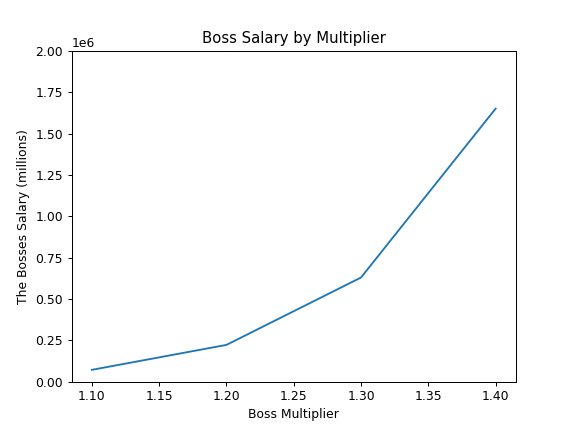

interactive(children=(IntSlider(value=3, description='team_size', max=10, min=3), Output()), _dom_classes=('wi…

In [15]:
def calc_salaries_with_team_size(team_size):
    return [40*52*10*(n**num_bosses(1000000, team_size)) for n in x_s]


fig_by_multiplier = plt.figure()
ax_by_multiplier = fig_by_multiplier.add_subplot(ylim=(0,2000794), title="Boss Salary by Multiplier", xlabel='Boss Multiplier', ylabel='The Bosses Salary (millions)')
x_s = [x/10 for x in range(11,15)]
y_s = calc_salaries_with_team_size(3)
line, = ax_by_multiplier.plot(x_s, y_s)


def update_team_size(team_size = 3):
    new_y_s = calc_salaries_with_team_size(team_size)
    line.set_ydata(new_y_s)
    fig_by_multiplier.canvas.draw_idle()

i0 = interact(update_team_size, team_size=(3, 10, 1))


# Interactive Chart 2

Below you can see a chart of how the Boss Salary changes with team-size. There is a slider below the chart that allows you to adjust the multipler that is used to generate the chart interactively.

<IPython.core.display.Javascript object>


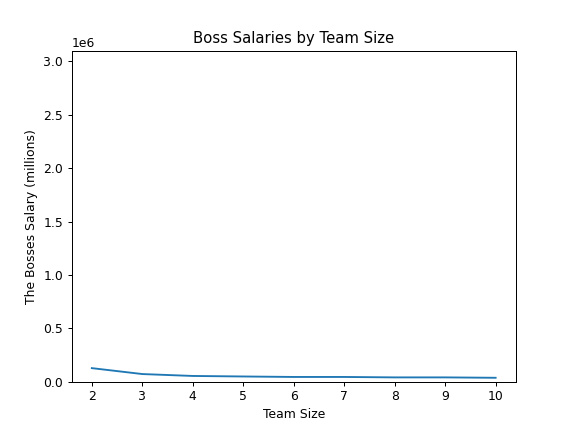

interactive(children=(FloatSlider(value=1.1, description='boss_multiplier', max=1.3, min=1.1, step=0.02), Outp…

In [16]:

def calc_salaries(boss_multiplier):
    return [40*52*10*(boss_multiplier**num_bosses(1000000, n)) for n in x_s]


fig_by_team_size = plt.figure()
ax_by_team_size = fig_by_team_size.add_subplot(ylim=(0,3100794), title="Boss Salaries by Team Size", xlabel='Team Size', ylabel='The Bosses Salary (millions)')
x_s = [x for x in range(2,11)]
y_s = calc_salaries(1.1)

line, = ax_by_team_size.plot(x_s, y_s)


def update_multiplier(boss_multiplier = 1.1):
    new_y_s = calc_salaries(boss_multiplier)
    line.set_ydata(new_y_s)
    fig_by_team_size.canvas.draw_idle()

i1 = interact(update_multiplier, boss_multiplier=(1.1, 1.3, 0.02))

# Tabulating Boss Salaries

Below find a table that lists boss salaries by 
- team size (3 to 9) in the rows
- 'boss multiplier' (how much more a boss earns that their subordinates - 1.1 to 1.9) in the columns

There are sliders to set the variables for the minimum wage and total population which, when moved, will change the values in the table accordingly.

In [13]:
import pandas as pd


pd.set_option('display.float_format', lambda x: '${:,.0f}'.format(x))


@interact(min_wage=(5, 20), population=(100000, 1000000, 100000))
def table(min_wage, population):
    result = []
    for i, team_size in enumerate(range(3, 10)):
        vals = []
        for j, boss_multiplier in enumerate([x/10 for x in range(11, 20)]):
            vals.append(40*52*min_wage*(boss_multiplier**num_bosses(population, team_size)))
        result.append(vals)
    return pd.DataFrame(result, index=range(3,10), columns=[str(x/10) for x in range(11, 20)]).round(0)

interactive(children=(IntSlider(value=12, description='min_wage', max=20, min=5), IntSlider(value=500000, desc…

# Final Thoughts: Obvious Differences to Real World


Reasons that people are paid more:

* specialities/more valuable or rare skills
* years of education - acts as an investment
* jobs no-one wants to do
* incentivise the best people to do the most important work
* incentivise people to not misbehave in positions of asymmetric power (does that work?)


Reasons we may over-estimate:

* many distinct hierarchies exist
    * different companies
    * different government bodies
 